<a href="https://colab.research.google.com/github/bogumilawalendziak/neural-networks-learning/blob/main/Sieci_neuronowe_nauka_rozpoznawanie_liczb_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%tensorflow_version 2.x

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

np.set_printoptions(precision=12,suppress=True, linewidth=120)
print(tf.__version__)


2.8.0


Załadowanie danych

In [4]:
(X_train, y_train), (X_test, y_test) = load_data()
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

11501568/11490434 [==============================] - 0s 0us/step
X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [5]:
print(X_train[5])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  13  25 100 122   7   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  33 151 208 252 252 252 146   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  40 152 244 252 253 224 211 252 232  40   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  15 152 239 252 252 252 216  31  37 252 25

In [6]:
print(f'X_train[0] shape: {X_train[0].shape}')

X_train[0] shape: (28, 28)


Standaryzacja danych

(-0.5, 27.5, 27.5, -0.5)

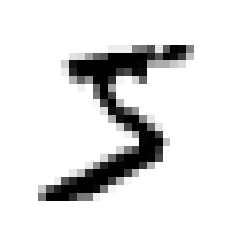

In [7]:
X_train= X_train/255.
X_test = X_test/255.

plt.imshow(X_train[0],cmap='gray_r')
plt.axis('off')


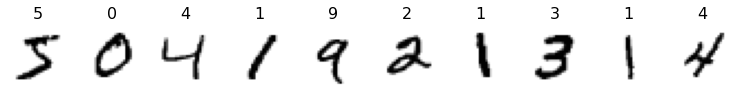

In [8]:
plt.figure(figsize=(13,13))
for i in range(1,11):
  plt.subplot(1,10,i)
  plt.axis('off')
  plt.imshow(X_train[i-1],cmap='gray_r')
  plt.title(y_train[i-1],color='black',fontsize=16)
plt.show()

Budowa sieci neuronowej

In [9]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(units=128, activation ='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=10,activation ='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [10]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [11]:
history = model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2962 - accuracy: 0.9146
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1427 - accuracy: 0.9577
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1059 - accuracy: 0.9673
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0899 - accuracy: 0.9716
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0733 - accuracy: 0.9771


Ocena modelu na zbiorze testowym



In [12]:
model.evaluate(X_test,y_test,verbose=2)

313/313 - 1s - loss: 0.0672 - accuracy: 0.9801 - 515ms/epoch - 2ms/step


[0.0672275722026825, 0.9800999760627747]

In [13]:
metrics = pd.DataFrame(history.history)
metrics

,loss,accuracy
0,0.296163,0.914550
1,0.142722,0.957667
2,0.105852,0.967267
3,0.089911,0.971583
4,0.073289,0.977100


Wykres

In [14]:
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(y=metrics['loss'], name='loss'), row=1, col=1)
fig.add_trace(go.Scatter(y=metrics['accuracy'], name='accuracy'), row=2, col=1)
fig.update_layout(width=800)

Predykcja na podstawie modelu


In [15]:
model.predict(X_test)

array([[0.000000814184, 0.000000039154, 0.000008648568, ..., 0.9999585     , 0.000000314796, 0.000001777644],
       [0.000000002514, 0.00002039217 , 0.99997914    , ..., 0.            , 0.000000252743, 0.            ],
       [0.000000061414, 0.99881506    , 0.00085574    , ..., 0.00017445345 , 0.00009843215 , 0.000000412876],
       ...,
       [0.000000000002, 0.00000000034 , 0.000000000798, ..., 0.000003214108, 0.000004217064, 0.00012234459 ],
       [0.000000081042, 0.000000000214, 0.000000000062, ..., 0.00000000059 , 0.00019001847 , 0.00000000327 ],
       [0.000000062856, 0.000000000001, 0.000000070746, ..., 0.            , 0.000000001806, 0.00000000015 ]],
      dtype=float32)

In [23]:
#y_pred = model.predict_classes(X_test)
y_pred=model.predict(X_test) 
y_pred=np.argmax(y_pred,axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [24]:
pred = pd.concat([pd.DataFrame(y_test,columns=['y_test']),pd.DataFrame(y_pred,columns=['y_pred'])],axis=1)
pred.head(10)

,y_test,y_pred
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9


In [25]:
misclassified = pred[pred['y_test'] != pred['y_pred']]
misclassified.index[:10]

Int64Index([18, 61, 151, 247, 259, 321, 340, 381, 445, 448], dtype='int64')

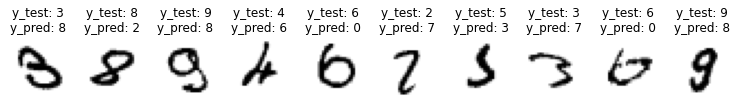

In [28]:
plt.figure(figsize=(13,13))
for i,j in zip(range(1,11), misclassified.index[:10]):
  plt.subplot(1,10,i)
  plt.axis('off')
  plt.imshow(X_test[j],cmap='gray_r')
  plt.title('y_test: ' + str(y_test[j]) + '\n' + 'y_pred: ' + str(y_pred[j]), color = 'black',fontsize =12)